# Federalist Papers Authorship Attribution – Machine Learning Approach

This notebook uses stylometric features (1-gram proportions) to perform authorship attribution on the Federalist Papers. We train models on texts with known authorship (Hamilton, Madison, Jay), and use them to predict the authorship of disputed and co-authored papers.

## 📦 1. Load and Prepare Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data, skipping first two rows
df = pd.read_csv("lexos_1gram_inALL_prop.csv", skiprows=2)
df.rename(columns={df.columns[0]: "Document"}, inplace=True)
df["Author"] = df["Document"].str.extract(r'_(\w)$')


In [5]:
df

,Document,0.0931,0.0619,0.0374,0.027,0.0231,0.0207,0.0205,0.0146,0.0133,...,0.0.6877,0.0.6878,0.0.6879,0.0.6880,0.0.6881,0.0.6882,0.0.6883,0.0.6884,0.0.6885,Author
0,FED_18_C,0.1136,0.0639,0.0256,0.0374,0.0194,0.0175,0.0028,0.0099,0.0123,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
1,FED_19_C,0.1015,0.0610,0.0288,0.0400,0.0200,0.0132,0.0068,0.0063,0.0093,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
2,FED_20_C,0.0901,0.0533,0.0276,0.0355,0.0257,0.0184,0.0046,0.0059,0.0079,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,FED_49_D,0.1077,0.0611,0.0351,0.0254,0.0206,0.0200,0.0284,0.0127,0.0157,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,FED_50_D,0.0911,0.0541,0.0252,0.0298,0.0252,0.0126,0.0280,0.0108,0.0144,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FED_44_M,0.1086,0.0590,0.0279,0.0303,0.0228,0.0148,0.0186,0.0097,0.0066,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
81,FED_45_M,0.1308,0.0673,0.0311,0.0296,0.0188,0.0094,0.0245,0.0141,0.0089,...,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
82,FED_46_M,0.1156,0.0618,0.0328,0.0279,0.0176,0.0160,0.0275,0.0149,0.0122,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
83,FED_47_M,0.1191,0.0681,0.0237,0.0313,0.0226,0.0128,0.0128,0.0131,0.0080,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M


In [ ]:

# Separate features and labels
X = df.drop(columns=["Document", "Author"])
y = df["Author"]

# Separate known and unknown authors
mask_known = y.isin(["H", "M", "J"])
X_known = X[mask_known]
y_known = y[mask_known]

mask_unknown = y.isin(["D", "C"])
X_unknown = X[mask_unknown]
doc_ids_unknown = df[mask_unknown]["Document"]

## 🧠 2. Train and Evaluate Models

In [2]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Net (MLP)": MLPClassifier(max_iter=1000)
}

results = []
fitted_models = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', model)
    ])
    scores = cross_val_score(pipe, X_known, y_known, cv=5, scoring='accuracy')
    results.append((name, scores.mean(), scores.std()))
    pipe.fit(X_known, y_known)
    fitted_models[name] = pipe

## 📊 3. Visualize Accuracy

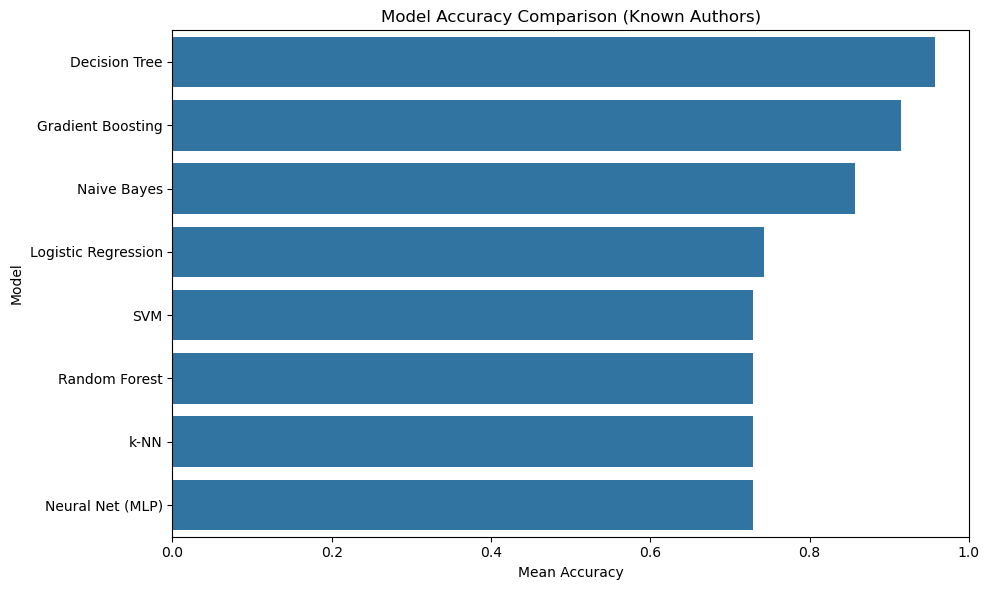

,Model,Mean Accuracy,Std Dev
3,Decision Tree,0.957143,0.057143
6,Gradient Boosting,0.914286,0.028571
1,Naive Bayes,0.857143,0.078246
0,Logistic Regression,0.742857,0.057143
2,SVM,0.728571,0.028571
4,Random Forest,0.728571,0.028571
5,k-NN,0.728571,0.028571
7,Neural Net (MLP),0.728571,0.028571


In [3]:
results_df = pd.DataFrame(results, columns=["Model", "Mean Accuracy", "Std Dev"])
results_df = results_df.sort_values(by="Mean Accuracy", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Mean Accuracy", y="Model", data=results_df)
plt.title("Model Accuracy Comparison (Known Authors)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

results_df

## 🔍 4. Predict Disputed and Co-Authored Papers

In [4]:
best_model_name = results_df.iloc[0]["Model"]
best_model = fitted_models[best_model_name]
predictions = best_model.predict(X_unknown)

pd.DataFrame({
    "Document": doc_ids_unknown.values,
    "Predicted Author": predictions
})

,Document,Predicted Author
0,FED_18_C,J
1,FED_19_C,M
2,FED_20_C,M
3,FED_49_D,M
4,FED_50_D,M
5,FED_51_D,J
6,FED_52_D,M
7,FED_53_D,M
8,FED_54_D,M
9,FED_55_D,M


## ✅ 5. Summary and Next Steps

- Trained multiple classifiers on known-author Federalist Papers using 1-gram proportions.
- Evaluated model performance using cross-validation.
- Used best model to predict authors of disputed and co-authored texts.
- You can extend this by incorporating 2-gram data, feature selection, or ensembling techniques.